# IRSALINA LAYALIA SHABRINA

# FINAL PROJECT - Graduate Admission Dataset

Data Graduate Admission diperoleh dari https://www.kaggle.com/mohansacharya/graduate-admissions. Dataset ini berkaitan dengan penerimaan pada Program Master di University of California, Los Angeles (UCLA). Parameter yang menjadi penentu peluang diterima pada program tersebut antara lain
1. GRE Scores (maks 340): Graduate Record Examination, tes masuk program master
2. TOEFL Scores (maks 120): Nilai TOEFL
3. University Rating : peringkat universitas
4. SOP: Statement of Purpose
5. LOR: Letter of Recommendation 
6. CGPA(maks 10): Undergraduate GPA 
7. Research : Pengalaman Riset
8. Chance of Admit: Peluang diterima

In [1]:
#IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#IMPORT DATA
data=pd.read_csv('F://APPLY KERJA/APPLY/DTS/BDA/FINAL PROJECT/DATA/Admission_Predict_Ver1.1.csv')
del data['Serial No.']
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.shape

(500, 8)

Data terdiri dari 500 observasi dan 8 variabel.

GRE Scores, TOEFL Score, University Rating, SOP, LOR, CGPA, dan Research merupakan variabel bebas, sedangkan Chance of Admit merupakan variabel terikat.


# Identifikasi Missing Values

In [58]:
np.sum(data.isnull())

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Tidak terdapat observasi yang mengandung missing value

# Statistika Deskriptif

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.3 KB


Pada dataset digunakan dua tipe data yaitu integer dan float yang termasuk ke dalam tipe data numerik dan dataset tidak memiliki tipe data kategorik

In [5]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# KORELASI

In [6]:
#Analisis korelasi dengan koefisien korelasi
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


Untuk mempermudah pembacaan, digunakan heatmap untuk menunjukkan korelasi

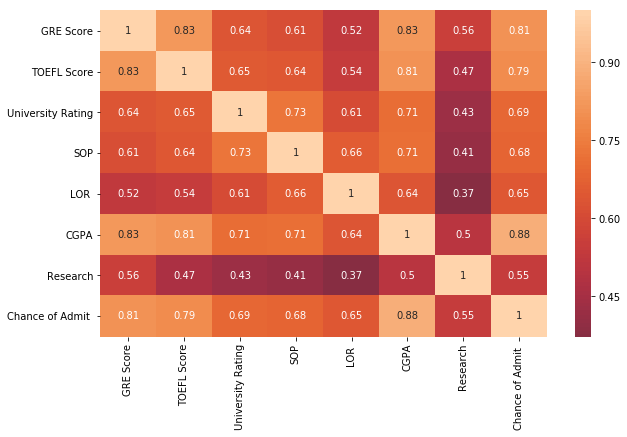

In [7]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(data.corr(), center=0, annot=True)

Semakin terang warna sel menunjukkan nilai korelasi yang semakin besar. Berdasarkan heatmap tersebut diketahui 'GRE Score' dan 'CGPA' berkorelasi kuat terhadap 'Chance of Admit ' dengan koefisien korelasi sebesar 0,81 dan 0,88. Selanjutnya akan dicari model regresi linear berganda dengan GRE Score dan CGPA sebagai variabel bebas (x) dan Chance of Admit sebagai variabel terikat (y).

# Scatter Plot

In [8]:
data2=data.filter(items=['GRE Score','CGPA','Chance of Admit '])
data2.head()

,GRE Score,CGPA,Chance of Admit
0,337,9.65,0.92
1,324,8.87,0.76
2,316,8.00,0.72
3,322,8.67,0.80
4,314,8.21,0.65


In [10]:
x = np.array(data['GRE Score'],data['CGPA'])
y = np.array(data['Chance of Admit '])

Text(0.5, 0, 'Chance of Admit ')

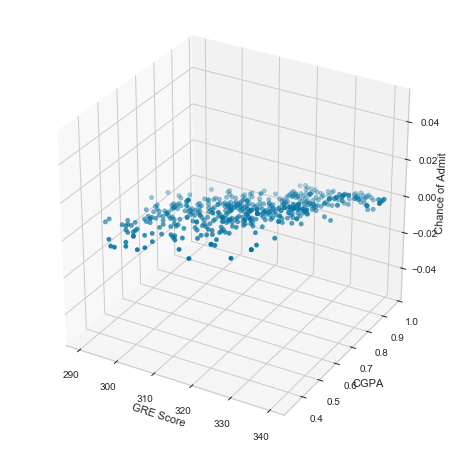

In [106]:
#scatter plot antara 'GRE SCore',CGPA' dan 'CHANCE OF ADMIT'
x = np.array(data['GRE Score'],data['CGPA'])
y = np.array(data['Chance of Admit '])
fig = plt.figure(1,figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y)
#ax.view_init(25, 185)
ax.set_xlabel('GRE Score')
ax.set_ylabel('CGPA')
ax.set_zlabel('Chance of Admit ')

Berdasarkan scatter plot diketahui bahwa dataset memiliki outlier sehingga harus dilakukan data cleaning

# Menghilangkan Outlier

In [49]:
#mendeteksi ooutlier
rataratagpa=data['CGPA'].mean()
stdgpa=data['CGPA'].std()
rataratapeluang=data['Chance of Admit '].mean()
stdpeluang=data['Chance of Admit '].std()
rataratagre=data['GRE Score'].mean()
stdgre=data['GRE Score'].std()


#menghapus outlier dengan menggunakan Zscore dengan threshold bernilai 2
databersih=data[(np.abs((data['GRE Score']-rataratagre)/stdgre)<=2) 
                & (np.abs((data['Chance of Admit ']-rataratapeluang)/stdpeluang)<=2)]
databersih=data[(np.abs((data['CGPA']-rataratagpa)/stdgpa)<=2) 
                & (np.abs((data['Chance of Admit ']-rataratapeluang)/stdpeluang)<=2)]
databersih

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


Text(0.5, 0, 'Chance of Admit ')

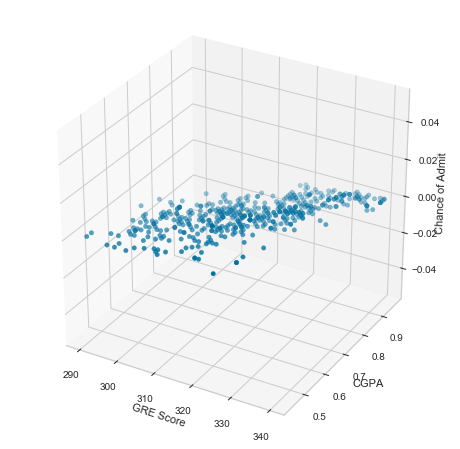

In [100]:
#scatter plot antara 'GRE Score','CGPA' dan 'CHANCE OF ADMIT'
x = np.array(databersih['GRE Score'],databersih['CGPA'])
y = np.array(databersih['Chance of Admit '])
fig = plt.figure(2,figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y)
#ax.view_init(25, 185)
ax.set_xlabel('GRE Score')
ax.set_ylabel('CGPA')
ax.set_zlabel('Chance of Admit ')

# MULTIPLE LINEAR REGRESSION

In [128]:
import statsmodels
import patsy
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [129]:
data2=databersih.filter(items=['GRE Score','CGPA','Chance of Admit '])
data2.head()

,GRE Score,CGPA,Chance of Admit
0,337,9.65,0.92
1,324,8.87,0.76
2,316,8.00,0.72
3,322,8.67,0.80
4,314,8.21,0.65


In [130]:
#Pilih GRE Score dan CGPA untuk variabel x dan Chance of Admit sebagai variabel y:
feature_names=['GRE Score','CGPA']
x=data2[feature_names]
x
y=data2['Chance of Admit ']

Kemudian dilakukan pemisahan dataset menjadi data train dan data test dengan data test sebanyak 1/3 bagian.

In [131]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=1/3,random_state=0)

In [132]:
from sklearn.linear_model import LinearRegression

#Linear regression model
regressor=LinearRegression()

#Membuat model dengan data latih
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [133]:
y_pred = regressor.predict(x_test)

In [134]:
#mencari model regresi
model=sm.OLS(y,x).fit()
predictions=model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 2.208e+04
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        11:34:32   Log-Likelihood:                 544.97
No. Observations:                 470   AIC:                            -1086.
Df Residuals:                     468   BIC:                            -1078.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GRE Score     -0.0035      0.000    -13.199      0.000      -0.004      -0.003
CGPA           0.2153      0.010     21.855      0.000       0.196       0.235
==============================================================================
Omnibus:                       25.737   Durbin-Watson:                   1.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.469
Skew:                          -0.572   Prob(JB):                     6.58e-07
Kurtosis:                       3.382   Cond. No.                         891.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
#menambahkan variabel konstan
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
model.summary()

C:\Users\user\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     830.6
Date:                Mon, 18 Nov 2019   Prob (F-statistic):          1.57e-154
Time:                        11:34:35   Log-Likelihood:                 661.32
No. Observations:                 470   AIC:                            -1317.
Df Residuals:                     467   BIC:                            -1304.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5373      0.089    -17.297      0.000      -1.712      -1.363
GRE Score      0.0030      0.000      6.920      0.000       0.002       0.004
CGPA           0.1538      0.008     18.132      0.000       0.137       0.170
==============================================================================
Omnibus:                      106.296   Durbin-Watson:                   0.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.131
Skew:                          -1.118   Prob(JB):                     2.20e-59
Kurtosis:                       5.965   Cond. No.                     1.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

berdasarkan perhitungan diatas diperoleh model linear seperti berikut: y =-1.5373+ 0.0030GREScore+0.1538CGPA. Ini berarti untuk setiap perubahan satu satuan pada 'CGPA' akan meningkatkan 'Chance of Admit' sebesar 0.20429778

Berdasarkan model diatas artinya jika GRE Score dan CGPA mendekati nol maka nilai 'Chance of Admit' berkurang sebesar 1.5373. Sedangkan jika GRE Score naik satu satuan akan menaikkan nilai Chance of Admit sebesar 0.0030 dan jika CGPA naik satu satuan maka akan menaikkan Chance of Admit sebesar 0.1538.

# Validasi Model

In [136]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print('Mean absolute error: %.2f' % np.mean(np.absolute(y_pred-y_test)))
print('MSE: %.4f' % mean_squared_error(y_test, y_pred))
from sklearn.metrics import r2_score
print('R2-score: %.2f' % r2_score(y_test, y_pred))

Mean absolute error: 0.04
MSE: 0.0037
R2-score: 0.78


dengan R-square sebesar 0.78 variabel GRE Score dan CGPA dapat menjelaskan variabel Chance of Admit.

# Clustering

In [115]:
X=databersih.filter(items=['GRE Score','Chance of Admit '])
X.head()

,GRE Score,Chance of Admit
0,337,0.92
1,324,0.76
2,316,0.72
3,322,0.80
4,314,0.65


In [116]:
X=X.values

In [23]:
conda install -c districtdatalabs yellowbrick

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [117]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [118]:
## Menggunakan metode elbow untuk menentukan angka cluster yang tepat
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)

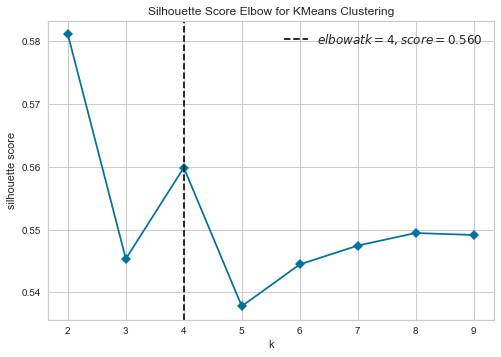

In [119]:
#fit data dan visualisasi
visualizer.fit(X)    
visualizer.poof()

Berdasarkan visualisasi, dapat dilihat bahwa bentuk elbow (siku) terlihat saat jumlah kluster adalah 4 dan pada saat k=4 diperoleh nilai shilhoutte tertinggi. Oleh karena itu, dapat tentukan bahwa jumlah K yang baik adalah 4.

In [120]:
# Menjalankan K-Means Clustering ke dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [121]:
#nilai centroid pada tiap cluster
print(kmeans.cluster_centers_)

[[323.36666667   0.79133333]
 [301.49494949   0.59979798]
 [333.33333333   0.90833333]
 [313.20645161   0.67864516]]


In [122]:
print(kmeans.labels_)

[2 0 3 0 3 2 0 3 1 0 0 0 0 1 3 3 3 0 3 1 3 0 0 2 2 0 1 1 0 2 2 0 1 1 1 1 3
 3 3 2 0 0 2 2 0 0 3 3 2 0 0 0 3 1 3 1 1 3 0 0 0 3 3 0 2 2 0 3 3 2 0 1 1 3
 2 0 0 2 0 3 3 3 3 3 1 1 2 2 0 0 3 3 3 0 3 2 2 2 1 1 0 1 0 3 3 1 1 0 2 2 3
 3 1 1 0 0 0 2 2 1 3 0 2 3 3 3 0 3 2 2 2 0 0 3 0 3 2 2 0 0 0 3 3 3 1 1 3 1
 3 3 2 0 1 3 1 3 3 2 0 0 0 0 2 0 3 1 1 1 1 3 3 0 3 2 2 0 0 0 0 2 3 1 1 3 3
 3 3 3 1 1 3 3 1 1 0 0 2 2 2 2 0 0 0 3 3 3 0 3 1 1 1 3 3 0 3 0 3 1 2 0 0 2
 3 1 1 3 0 0 3 0 3 3 0 0 0 3 3 2 0 1 3 0 0 2 0 3 3 0 0 3 3 3 0 3 1 1 1 3 3
 0 2 0 3 1 3 3 3 0 2 2 2 0 3 3 1 1 1 3 3 3 3 0 2 1 3 0 0 0 3 0 0 0 3 3 0 0
 3 1 1 3 1 1 0 0 3 0 3 1 3 0 1 1 0 0 3 3 0 3 0 0 2 0 0 3 0 3 1 3 1 3 3 0 1
 1 1 3 0 1 3 0 0 2 2 1 3 2 0 3 1 1 3 0 2 0 1 1 3 0 0 0 1 2 1 1 1 0 3 3 0 3
 2 0 0 2 3 2 1 3 0 2 3 1 0 1 1 1 1 3 3 3 0 0 3 3 3 3 0 0 2 0 3 3 3 2 3 0 0
 3 1 3 3 3 3 1 2 2 0 0 0 0 0 3 3 0 0 0 0 3 1 1 3 2 0 1 1 1 1 3 3 0 0 0 3 0
 3 3 1 1 3 3 0 0 0 0 1 3 3 0 0 0 1 1 1 1 1 1 2 2 3 0]


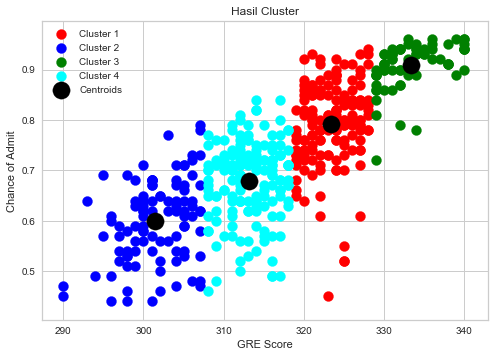

In [127]:
# Visualisasi hasil clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Hasil Cluster')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.legend()
plt.show()

Berdasarkan gambar tersebut diketahui bahwa terdapat empat cluster yang dikelompokkan berdasarkan 4 kelompok nilai dalam GRE Score yaitu
1. Dibawah 309
2. Diantara 309-319
3. Diantara 319-329
4. Diatas 329

Semakin besar GRE Score maka semakin besar kesempatan untuk diterima

pengelompokan ini bisa digunakan sebagai passing grade untuk masuk ke program Master dan membantu melihat seberapa besar peluang mereka untuk diterima pada program tersebut.